In [2]:
import subprocess
# import tqdm
from tqdm.notebook import tqdm

file_path = r"C:\Users\Tristan\Downloads\ExoSeer\Data\Parameters\Nitrogen1.txt"
curl2=f'curl -d type=trn key=8bd9208abbd2dd15f3dd -d whdr=y --data-urlencode file@"{file_path}" https://psg.gsfc.nasa.gov/api.php'
for i in tqdm(range(1)):
    try:
        # Execute the curl command using subprocess

        output2=subprocess.check_output(curl2,shell=True,text=True)
        with open(r"C:\Users\Tristan\Downloads\ExoSeer\Data\test.txt","w") as f:
            # print(f)
            print(output2)
            # f.write(output2)
            # f.close
        # output = subprocess.check_output(curl_command, shell=True, text=True)
        
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
 

  0%|          | 0/1 [00:00<?, ?it/s]

Error: Command 'curl -d type=trn key=8bd9208abbd2dd15f3dd -d whdr=y --data-urlencode file@"C:\Users\Tristan\Downloads\Science fair 2023\Data\Parameters\Nitrogen1.txt" https://psg.gsfc.nasa.gov/api.php' returned non-zero exit status 26.


In [7]:
import itertools
test=[1,2,3,4,5,6]
new=[]
for i in range(1,7):

    new+=list(itertools.combinations(test,i))
print(new)
print(len(new))

[(1,), (2,), (3,), (4,), (5,), (6,), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 5, 6), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 5, 6), (1, 4, 5, 6), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 5, 6), (2, 4, 5, 6), (3, 4, 5, 6), (1, 2, 3, 4, 5), (1, 2, 3, 4, 6), (1, 2, 3, 5, 6), (1, 2, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6)]
63


In [42]:
import os
newpath = r'C:\Users\Tristan\Downloads\ExoSeer\Data\hydrogen\anotherone'
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [26]:
with open(r"C:\Users\Tristan\Downloads\ExoSeer\Data\template.txt", "r+") as f:
    content=f.read()
    new=content.replace('<OBJECT-DIAMETER>22430\n','<OBJECT-DIAMETER>123123\n')
    f.seek(0)
    f.write(new)
    f.truncate()
    f.close
    # print(f.readlines()

ok


In [71]:
import math
def calculateGravity(radius,density):#Radius is in km and density is in g/cm^3
    gravConstant=6.6743*(10**-11)
    volume=(radius**3)*(4/3)*math.pi * 1000000000#m^3
    density*=1000#To convert g/cm^3 into kg/m^3
    mass=density*volume#In kg
    gravity= (gravConstant*mass)/(radius**2) / 1000000#To get it into right units
    return gravity

print(calculateGravity(3389,3.93))

6.407606985721898e+23
1.6304343475119335e+20
3.723560822096627


In [4]:
j=10
starDistanceRange=[i/100 for i in range(j,j+11)]
starDistanceRange

[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]

In [5]:
radius=[i for i in range(4,21)]
len(radius)

17

In [7]:
import random
import numpy as np
import os
import math
import subprocess
import csv
import time
start=time.time()
#Helper functions
def calculateGravity(radius,density):#Radius is in km and density is in g/cm^3
    gravConstant=6.6743*(10**-11)
    volume=(radius**3)*(4/3)*math.pi * 1000000000#m^3
    density*=1000#To convert g/cm^3 into kg/m^3
    mass=density*volume#In kg
    gravity= (gravConstant*mass)/(radius**2) / 1000000#To get it into right units
    return gravity
def createParameterFile(parameters,filePath):
    with open(r'C:\Users\Tristan\Downloads\ExoSeer\Data\template.txt', 'r') as original_file:
        # Read the contents of the original file
        template = original_file.read()

    #parameters is a dictionary with the parameters to be changed to what value
    #Go through text file and modify it
    with open(filePath,"w") as f:
        f.write(template)
    with open(filePath, "r+") as f:
        content=f.read()
        for p in parameters:
            content=content.replace(p,p+str(parameters[p]))
        f.seek(0)
        f.write(content)
        f.truncate()
        f.close
def getNumericalData(filePath):#Get numerical data from text file
    with open(filePath,'r') as f:
        lines=f.readlines()
    numericalData=[]
    for line in lines:
        if not line.startswith("#") or line.startswith("# Wave/freq"):
            numericalValue=line.split()
            numericalData.append(numericalValue)
    return numericalData
def writeToCSV(data,outputFilePath):#Converts numerical data into a csv file
    with open(outputFilePath,"w",newline='') as f:
        writer=csv.writer(f)
        for row in data:
            writer.writerow(row)




molecules={"O2":"Oxygen","CO2":"CarbonDioxide","He":"Helium","CH4":"Methane","H2":"Hydrogen","H2O":"Water"}
stars=["M","G"]#Red dwarf and yellow dwarf 

densities=[i/100 for i in range(50,600,10)]
radius=[i for i in range(4,21)]#The ranges for the raidus, it will randomly pick between 4k and 21k

redDwarfTemp=list(range(2000,3501))
redDwarfRad=[i/100 for i in range(10,61)]

yelDwarfTemp=list(range(5300,6001))
yelDwarfRad=[i/100 for i in range(90,111)]

starDistances=[i for i in range(10,50,10)]#The range for the star distances

HITRANValues={"O2":"HIT[7]","CO2":"HIT[2]","He":"HIT[0]0","CH4":"HIT[6]","H":"HIT[45]","H2O":"HIT[1]"}#For the parameter atmosphere-type

trainingFilePath=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Training'

#Just create folders for each molecule, svm will be one vs all, this will still let it allow to classify multiple molecules.

#Creating the relevant folder for each molecule
for molecule in molecules.values():
    newPath=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Training'
    newPath+=f'\{molecule}'
    os.makedirs(newPath)

counter=1
for molecule in molecules:
    folderPath=trainingFilePath+f'{molecules[molecule]}'
    for i in range(10):#1700 files for each molecule
        for star in stars:#2 iterations
            for j in starDistances:#5 iterations
                starDistanceRange=[a/100 for a in range(j,j+11)]
                for k in radius:#17 iterations
                    
                    radiusRange=[b for b in range(k*1000,(k+1)*1000)]
                    rad=random.choice(radiusRange)
                    density=random.choice(densities)
                    starDist=random.choice(starDistanceRange)
                    if star=="M":
                        starTemp=random.choice(redDwarfTemp)
                        starRad=random.choice(redDwarfRad)
                    else:
                        starTemp=random.choice(yelDwarfTemp)
                        starRad=random.choice(yelDwarfRad)
                    gravity=calculateGravity(rad,density)

                    starDistance=random.choice(starDistanceRange)
                    parameters={'<OBJECT-DIAMETER>':rad*2,'<OBJECT-GRAVITY>':gravity,'<OBJECT-STAR-DISTANCE>':starDist,'<OBJECT-STAR-TYPE>':star,'<OBJECT-STAR-TEMPERATURE>':starTemp,'<OBJECT-STAR-RADIUS>':starRad,'<ATMOSPHERE-GAS>':molecule,'<ATMOSPHERE-TYPE>':HITRANValues[molecule]} 
                    parameterFolder=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Parameters'
                    dataFolder=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Training'+f'\{molecules[molecule]}'
                    parameterFile=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Parameters' + f'\{molecules[molecule]}{counter}'+'.txt'
                    createParameterFile(parameters,parameterFile)
                    #Upload to PSG API recieve data, add to training data folder
                    curlCommand=f'curl -d type=trn -d whdr=y --data-urlencode file@"{parameterFile}" https://psg.gsfc.nasa.gov/api.php'
                    output=subprocess.check_output(curlCommand,shell=True,text=True)
                    
                    with open(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt','w') as dataFile:
                        dataFile.write(output)
                        extracted=getNumericalData(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt')
                        writeToCSV(extracted,dataFolder+f'\{molecules[molecule]}{counter}'+'.csv')
                        dataFile.close()
                    print(parameters)
                    #First column of data is wavelength in um. (x axis)
                    #6th column of data is contrast (y axis)
                    counter+=1
                    break
                break
            break
        break
    break


print("Training data generated")
# counter=1
# for i in range(2380):
#     molecule=random.choice(list(molecules.keys()))
#     star=random.choice(stars)
#     starDistance=random.choice(starDistances)
#     rad=random.randrange(4000,20000)
#     if star=="M":
#         starTemp=random.choice(redDwarfTemp)
#         starRad=random.choice(redDwarfRad)
#     else:
#         starTemp=random.choice(yelDwarfTemp)
#         starRad=random.choice(yelDwarfRad)
#     parameters={'<OBJECT-DIAMETER>':rad*2,'<OBJECT-GRAVITY>':gravity,'<OBJECT-STAR-DISTANCE>':starDist,'<OBJECT-STAR-TYPE>':star,'<OBJECT-STAR-TEMPERATURE>':starTemp,'<OBJECT-STAR-RADIUS>':starRad,'<ATMOSPHERE-GAS>':molecule,'<ATMOSPHERE-TYPE>':HITRANValues[molecule]} 
#     dataFolder=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Testing'
#     parameterFile=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Testing\param.txt'
#     createParameterFile(parameters,parameterFile)
#     #Upload to PSG API recieve data, add to training data folder
#     curlCommand=f'curl -d type=trn -d whdr=y --data-urlencode file@"{parameterFile}" https://psg.gsfc.nasa.gov/api.php'
#     output=subprocess.check_output(curlCommand,shell=True,text=True)
    
#     with open(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt','w') as dataFile:
#         dataFile.write(output)
#         extracted=getNumericalData(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt')
#         writeToCSV(extracted,dataFolder+f'\{molecules[molecule]}{counter}'+'.csv')
#         dataFile.close()
    
#     #First column of data is wavelength in um. (x axis)
#     #6th column of data is contrast (y axis)
#     counter+=1
# end=time.time()
# print(end-start)

{'<OBJECT-DIAMETER>': 9500, '<OBJECT-GRAVITY>': 6.5070481834508005, '<OBJECT-STAR-DISTANCE>': 0.13, '<OBJECT-STAR-TYPE>': 'M', '<OBJECT-STAR-TEMPERATURE>': 2740, '<OBJECT-STAR-RADIUS>': 0.14, '<ATMOSPHERE-GAS>': 'O2', '<ATMOSPHERE-TYPE>': 'HIT[7]'}
Training data generated


In [15]:
import random
molecules={"N2":"Nitrogen","O":"Oxygen","CO2":"CarbonDioxide","He":"Helium","CH4":"Methane","H2":"Hydrogen","H2O":"Water"}
stars=["M","G"]#Red dwarf and yellow dwarf 

densities=[i/100 for i in range(50,600,10)]
radius=[i for i in range(4,21)]#The ranges for the raidus, it will randomly pick between 4k and 21k

redDwarfTemp=list(range(2000,3501))
redDwarfRad=[i/100 for i in range(10,61)]

yelDwarfTemp=list(range(5300,6001))
yelDwarfRad=[i/100 for i in range(90,111)]

starDistances=[i for i in range(10,50,10)]#The range for the star distances

HITRANValues={"N2":"HIT[22]","O":"HIT[34]","CO2":"HIT[2]","He":"HIT[0]0","CH4":"HIT[6]","H":"HIT[45]","H2O":"HIT[1]"}#For the parameter atmosphere-type

counter=1
for i in range(2):
    molecule=random.choice(list(molecules.keys()))
    star=random.choice(stars)
    starDistance=random.choice(starDistances)
    rad=random.randrange(4000,20000)
    if star=="M":
        starTemp=random.choice(redDwarfTemp)
        starRad=random.choice(redDwarfRad)
    else:
        starTemp=random.choice(yelDwarfTemp)
        starRad=random.choice(yelDwarfRad)
    parameters={'<OBJECT-DIAMETER>':rad*2,'<OBJECT-GRAVITY>':gravity,'<OBJECT-STAR-DISTANCE>':starDist,'<OBJECT-STAR-TYPE>':star,'<OBJECT-STAR-TEMPERATURE>':starTemp,'<OBJECT-STAR-RADIUS>':starRad,'<ATMOSPHERE-GAS>':molecule,'<ATMOSPHERE-TYPE>':HITRANValues[molecule]} 
    dataFolder=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Testing'
    parameterFile=r'C:\Users\Tristan\Downloads\ExoSeer\Data\Testing\param.txt'
    createParameterFile(parameters,parameterFile)
    #Upload to PSG API recieve data, add to training data folder
    curlCommand=f'curl -d type=trn -d whdr=y --data-urlencode file@"{parameterFile}" https://psg.gsfc.nasa.gov/api.php'
    output=subprocess.check_output(curlCommand,shell=True,text=True)
    
    with open(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt','w') as dataFile:
        dataFile.write(output)
        extracted=getNumericalData(r'C:\Users\Tristan\Downloads\ExoSeer\Data\temp.txt')
        writeToCSV(extracted,dataFolder+f'\{molecules[molecule]}{counter}'+'.txt')
        dataFile.close()
    
    #First column of data is wavelength in um. (x axis)
    #6th column of data is contrast (y axis)
    counter+=1


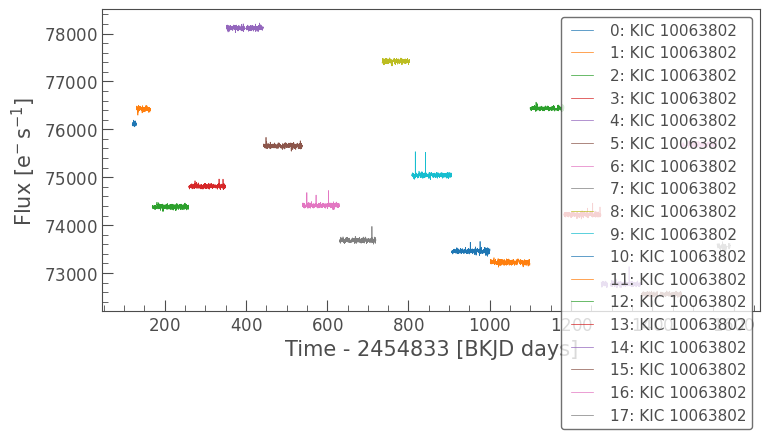

In [4]:
import lightkurve as lk
%matplotlib inline
# Search for Kepler observations of Kepler-1000
search_result=lk.search_lightcurve('Kepler-1000', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection=search_result.download_all()
lc_collection.plot();


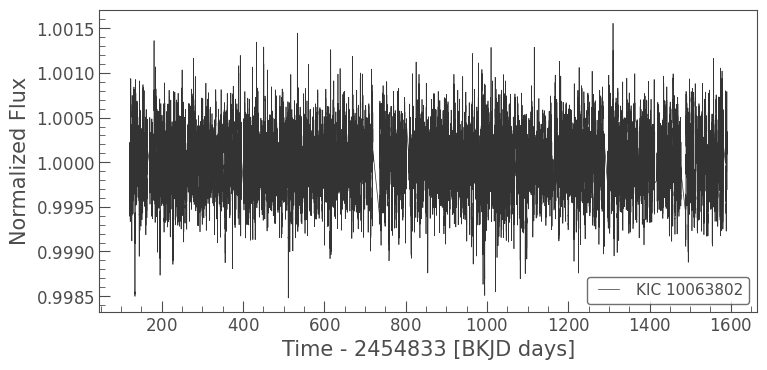

In [5]:
#.stitch removes the offset between the different observations
#.flatten() applies the Savitzky-Golay filter
#.remove_outliers() 
lc=lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

60.00990099009901 d
134.2092028392889
0.33 d


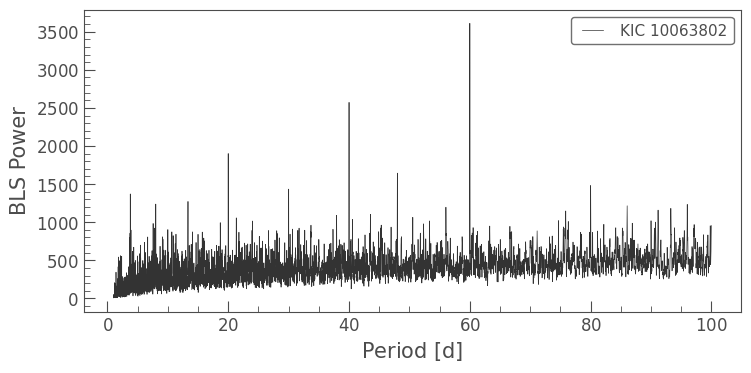

In [13]:
import numpy as np
#Periods to search
period=np.linspace(1,100,10000)#Period to search 1-20 split between 10,000 different points
bls=lc.to_periodogram(method='bls',period=period,frequency_factor=500)
bls.plot()

planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_dur = bls.duration_at_max_power
print(planet_period)
print(planet_t0)
print(planet_dur)

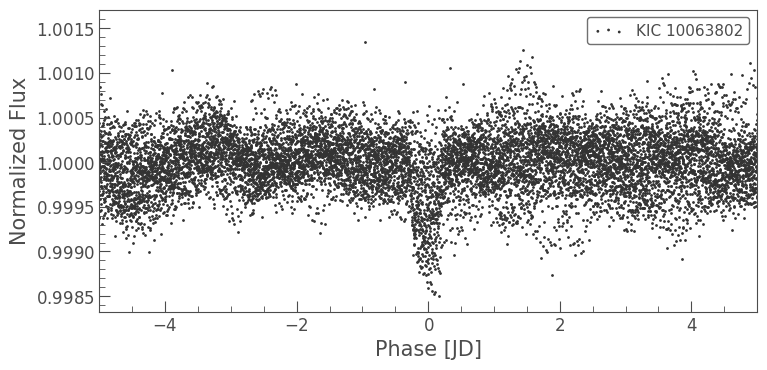

In [14]:
ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
ax.set_xlim(-5, 5);